In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.compose import TransformedTargetRegressor
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
import datetime
from datetime import timedelta
import ast
import json    
import missingno as msno
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display

In [4]:
df = pd.read_csv('../data/aqar.csv')

In [319]:
df.drop(['Unnamed: 0.1' , 'Unnamed: 0'] ,axis=1 , inplace=True)

In [5]:
df.sold.value_counts()

0    4646
8     413
2     394
4     350
1     282
5     261
3     184
6     117
7     115
Name: sold, dtype: int64

In [268]:
try:
    df.drop(['user' , 'rega_id'] , axis = 1 , inplace=True)
except:
     try:
        df.drop([ 'rega_id'] , axis = 1 , inplace=True)
     except:
        i=1

In [271]:
df.columns

Index(['user_id', 'id', 'title', 'price', 'content', 'imgs', 'refresh', 'beds',
       'livings', 'wc', 'area', 'street_width', 'age', 'last_update',
       'ketchen', 'ac', 'furnished', 'location', 'path', 'district', 'width',
       'length', 'advertiser_type', 'create_time', 'review', 'profileImg',
       'UserName', 'iam_verified', 'sold', 'soldAt'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6762 entries, 0 to 6761
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          6762 non-null   int64  
 1   id               6762 non-null   int64  
 2   title            6762 non-null   object 
 3   price            6762 non-null   int64  
 4   content          6668 non-null   object 
 5   imgs             6119 non-null   object 
 6   refresh          6762 non-null   object 
 7   beds             6762 non-null   int64  
 8   livings          6760 non-null   float64
 9   wc               6762 non-null   int64  
 10  area             6587 non-null   float64
 11  street_width     6552 non-null   float64
 12  age              6057 non-null   float64
 13  last_update      6762 non-null   object 
 14  ketchen          6745 non-null   float64
 15  ac               6743 non-null   float64
 16  furnished        6717 non-null   float64
 17  location      

In [18]:
notSold = df.loc[(df['sold'] == 0) ]


In [20]:
sold = df.loc[(df['sold'] != 0) ]

In [21]:
sold.describe()

,user_id,id,price,beds,livings,wc,area,street_width,age,ketchen,ac,furnished,width,length,review,rega_id,sold,soldAt
count,1.948000e+03,1.948000e+03,1948.000000,1948.000000,1948.000000,1948.000000,1906.000000,1900.000000,1736.000000,1947.000000,1945.000000,1940.000000,1484.000000,1484.000000,1844.000000,1948.0,1948.000000,1948.000000
mean,1.237034e+06,4.523678e+06,40203.213552,2.694045,1.007700,2.091376,185.815320,22.910000,2.730415,0.847458,0.655527,0.045876,16.915303,23.998187,4.354187,0.0,4.001027,26.914271
std,7.986757e+05,1.183272e+05,28192.854671,1.041425,0.414729,0.823304,515.795635,13.051436,4.461286,0.359638,0.475318,0.209271,38.649856,42.903281,0.406864,0.0,2.264257,39.937693
min,6.130000e+02,1.524584e+06,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000
25%,5.616945e+05,4.499779e+06,24500.000000,2.000000,1.000000,2.000000,100.000000,15.000000,0.000000,1.000000,0.000000,0.000000,8.000000,9.750000,4.210000,0.0,2.000000,8.000000
50%,1.049794e+06,4.556278e+06,35000.000000,3.000000,1.000000,2.000000,150.000000,20.000000,1.000000,1.000000,1.000000,0.000000,11.000000,13.000000,4.380000,0.0,4.000000,16.000000
75%,1.992649e+06,4.585747e+06,45000.000000,3.000000,1.000000,3.000000,190.000000,30.000000,4.000000,1.000000,1.000000,0.000000,15.000000,18.000000,4.560000,0.0,5.000000,36.000000
max,2.685054e+06,4.600241e+06,450000.000000,7.000000,4.000000,5.000000,18000.000000,100.000000,36.000000,1.000000,1.000000,1.000000,1000.000000,450.000000,5.000000,0.0,8.000000,1199.000000


In [22]:
notSold.describe()

,user_id,id,price,beds,livings,wc,area,street_width,age,ketchen,ac,furnished,width,length,review,rega_id,sold,soldAt
count,4.814000e+03,4.814000e+03,4814.000000,4814.000000,4812.000000,4814.000000,4.681000e+03,4652.000000,4321.000000,4798.000000,4798.000000,4777.000000,3178.000000,3178.000000,4519.000000,4814.0,4814.0,4814.0
mean,1.360956e+06,4.456271e+06,44517.502077,2.519526,0.983791,2.055879,2.570024e+03,23.235813,2.916223,0.879116,0.749479,0.091271,18.286938,57.989223,4.340407,0.0,0.0,0.0
std,8.434034e+05,2.135525e+05,29037.579576,1.142793,0.478760,0.967364,1.624205e+05,14.085667,4.733051,0.326026,0.433358,0.288024,33.826728,1971.135400,0.509212,0.0,0.0,0.0
min,7.000000e+00,2.118990e+05,55.000000,1.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0
25%,5.809750e+05,4.420473e+06,25000.000000,1.000000,1.000000,1.000000,9.000000e+01,15.000000,0.000000,1.000000,0.000000,0.000000,8.000000,8.000000,4.195000,0.0,0.0,0.0
50%,1.402482e+06,4.513766e+06,35000.000000,3.000000,1.000000,2.000000,1.400000e+02,20.000000,1.000000,1.000000,1.000000,0.000000,11.000000,12.000000,4.380000,0.0,0.0,0.0
75%,2.097594e+06,4.566355e+06,60000.000000,3.000000,1.000000,3.000000,1.800000e+02,30.000000,4.000000,1.000000,1.000000,0.000000,15.000000,17.375000,4.570000,0.0,0.0,0.0
max,2.684886e+06,4.600194e+06,450000.000000,7.000000,5.000000,5.000000,1.111110e+07,100.000000,36.000000,1.000000,1.000000,1.000000,800.000000,111111.000000,5.000000,0.0,0.0,0.0


In [25]:
notSold['area'].max()

11111100.0

In [39]:
notSold.loc[   notSold['area'] == 11111100  ]

3127    /شقق-للإيجار/الرياض/شرق-الرياض/حي-المونسية/شار...
Name: path, dtype: object

In [37]:
sold['area'].sort_values(ascending = False).head(20)

1570    18000.0
5698    10000.0
5923     5625.0
1508     3125.0
3911     3000.0
2970     3000.0
6661     2222.0
819      2040.0
2831     2040.0
6416     1230.0
3694     1100.0
390      1000.0
3277     1000.0
721      1000.0
1186      900.0
2095      900.0
2307      900.0
3039      900.0
2864      800.0
4080      720.0
Name: area, dtype: float64

In [35]:
notSold['area'].sort_values(ascending = False).head(20)

1729    11111100.0
1829      185600.0
5908       11110.0
3127        6400.0
6221        2780.0
4709        2500.0
3215        2450.0
5669        2000.0
1071        1800.0
3322        1200.0
3092        1000.0
2930        1000.0
2518        1000.0
686         1000.0
5940        1000.0
703         1000.0
4197        1000.0
4519        1000.0
3665        1000.0
6114        1000.0
Name: area, dtype: float64

In [53]:
notSold[notSold['area'] == 6400 ]['UserName']

3127    مكتب قمة المساكن للعقارات
Name: UserName, dtype: object

KeyError: 0

In [66]:
 sold['district'].value_counts().head(20)

حي النرجس      212
حي العارض      207
حي الملقا      126
حي اليرموك     110
حي الياسمين     98
حي المونسية     94
حي قرطبة        90
حي الرمال       70
حي القيروان     62
حي اشبيلية      57
حي طويق         47
حي ظهرة لبن     46
حي الشهداء      40
حي الربيع       37
حي العقيق       36
حي الخليج       30
حي الصحافة      29
حي المروج       27
حي الوادي       26
حي غرناطة       24
Name: district, dtype: int64

In [65]:
 notSold['district'].value_counts().head(20)

حي النرجس        598
حي الملقا        449
حي العارض        407
حي اليرموك       335
حي الياسمين      238
حي اشبيلية       178
حي القيروان      174
حي المونسية      173
حي العقيق        144
حي قرطبة         129
حي الشهداء       112
حي الخليج         94
حي غرناطة         91
حي الرمال         88
حي الصحافة        74
حي الربيع         71
حي ظهرة لبن       69
حي الملك فيصل     65
حي المهدية        64
حي حطين           64
Name: district, dtype: int64

In [392]:
to = df['district'].value_counts().head(20)
to  = to.reset_index(name='count'  )

In [179]:
to1 = sold['district'].value_counts().head(20)
t1 = to1.reset_index(name='count'  )

In [180]:
to2 = notSold['district'].value_counts().head(20)
to2 = to2.reset_index(name='count'  )

In [182]:
to1

حي النرجس      212
حي العارض      207
حي الملقا      126
حي اليرموك     110
حي الياسمين     98
حي المونسية     94
حي قرطبة        90
حي الرمال       70
حي القيروان     62
حي اشبيلية      57
حي طويق         47
حي ظهرة لبن     46
حي الشهداء      40
حي الربيع       37
حي العقيق       36
حي الخليج       30
حي الصحافة      29
حي المروج       27
حي الوادي       26
حي غرناطة       24
Name: district, dtype: int64

In [131]:
to = to.reset_index(name='count'  )


In [148]:

def modify_arabic_display(s):
    return get_display(arabic_reshaper.reshape(s.encode('utf-8').decode('utf8')))

In [393]:
if to["index"][0] =='ﺣﻲ ﺍﻟﻨﺮﺟﺲ':
            for index, row in to.iterrows():
    
                    to["index"][index] = modify_arabic_display(to["index"][index])
        
                    

In [181]:
if to1["index"][0] =='ﺣﻲ ﺍﻟﻨﺮﺟﺲ':
            for index, row in to1.iterrows():
    
                    to1["index"][index] = modify_arabic_display(to1["index"][index])

KeyError: 'index'

In [ ]:
if to["index"][0] =='ﺣﻲ ﺍﻟﻨﺮﺟﺲ':
            for index, row in to.iterrows():
    
                    to["index"][index] = modify_arabic_display(to["index"][index])

<AxesSubplot:xlabel='index'>

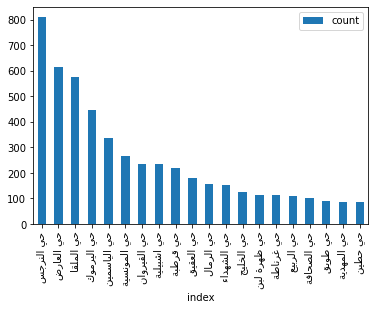

In [170]:
to.plot(kind = 'bar' , x='index')

<AxesSubplot:>

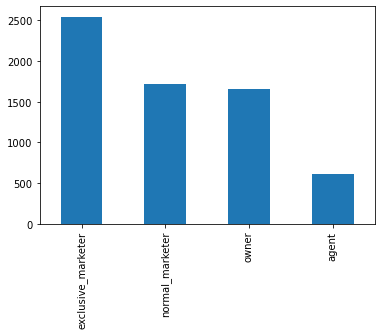

In [187]:
df['advertiser_type'].value_counts().plot(kind = 'bar')

In [197]:
df['iam_verified'].value_counts().sum()

6616

In [195]:
df['iam_verified'].sum()

6604

In [198]:
df['iam_verified'].value_counts()[1] / df['iam_verified'].value_counts().sum()

0.998186215235792

In [226]:
a = list(pd.DataFrame(df['district'].value_counts().head(10).reset_index(name='count'  ))['index'])

In [229]:
newdf = df.loc[df['district'].isin(a)]


<AxesSubplot:xlabel='district', ylabel='sold'>

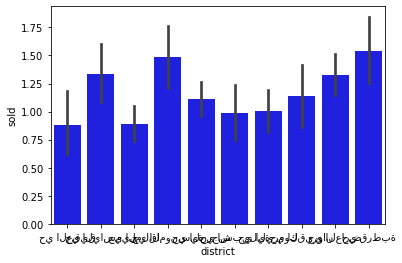

In [230]:
sns.barplot(x="district", y="sold", data=newdf,
            label="Alcohol-involved", color="b")

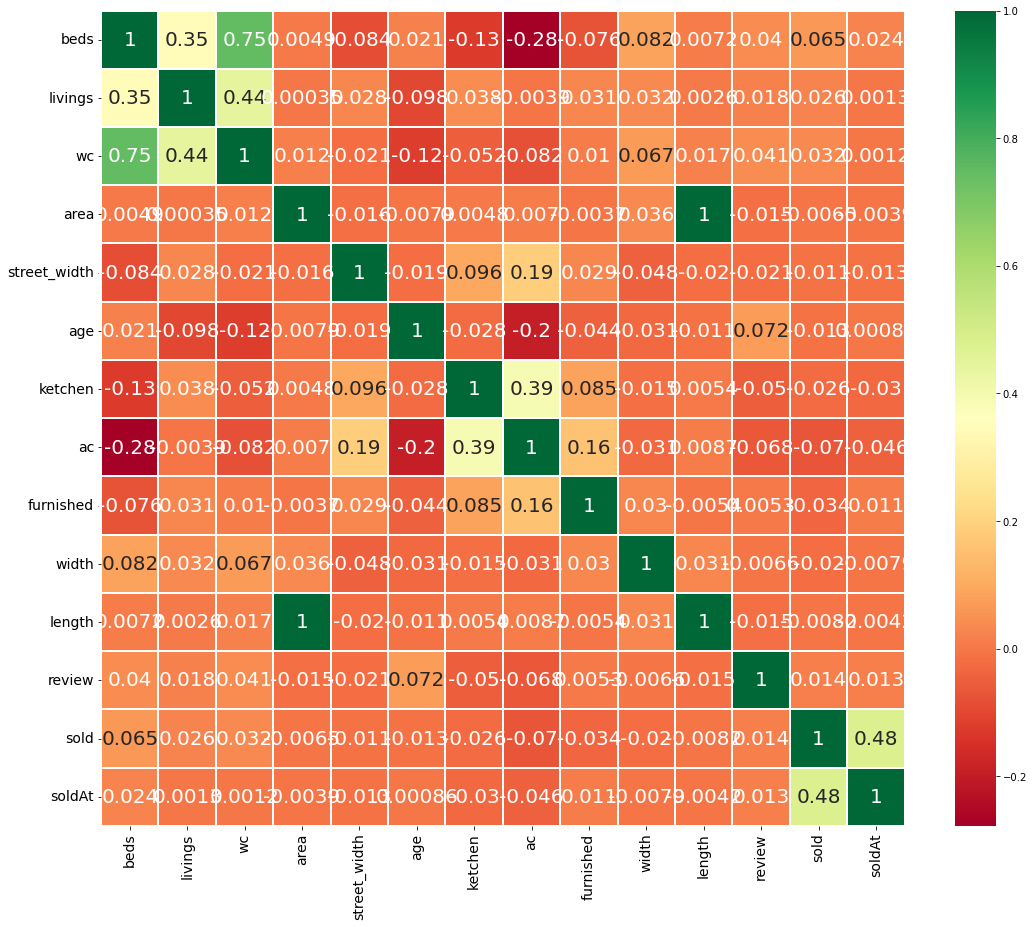

In [251]:
df.drop(['user_id', 'id', 'title', 'price', 'content', 'imgs', 'refresh', 'user' , 'path' , 'location' , 'last_update' ,'rega_id' ],axis=1,inplace=True)

sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

AttributeError: 'Rectangle' object has no property 'hue'

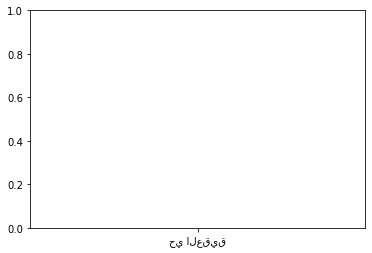

In [236]:
fig, ax = plt.subplots()
ax.hist(x, n_bins, density=False, histtype='bar', color=colors, label=colors)
# ax.set_ylabel('Scores')
# ax.set_title('Scores by group and gender')
# ax.legend()

plt.show()

<AxesSubplot:>

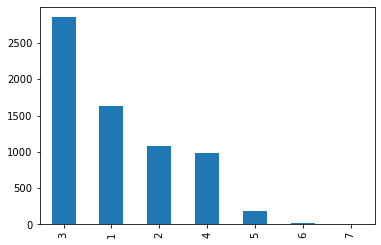

In [276]:
df['beds'].value_counts().plot(kind = 'bar')

In [281]:
len(df['create_time'])


6762

In [287]:
a = df['create_time'][2][2:12]
pd.to_datetime(a , format = '%Y-%m-%d')

Timestamp('2022-07-24 00:00:00')

In [348]:
copy = df

In [345]:
df['create_time'][1]

"['2022-08-06', '10:27:56']"

In [349]:
i=0 
while i < len(df['create_time']):
    a = df['create_time'][i][2:9]
    # a = pd.to_datetime(a , format = '%Y-%m-%d')
    copy['create_time'][i] = a
    i+=1

/tmp/ipykernel_29918/2031853434.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy['create_time'][i] = a


In [351]:
Copy = copy.groupby('create_time').size().reset_index(name = 'total')

In [344]:
copy

,create_time,total
0,2022-03,1
1,2022-07,4
2,2022-08,3


In [312]:
# copy = copy[copy['create_time'].str.contains("2022") == True]


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

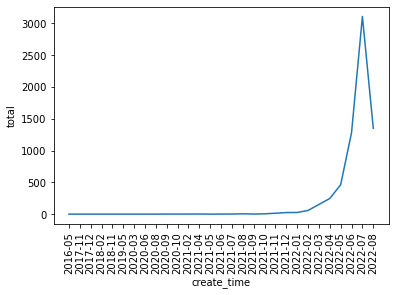

In [363]:
sns.lineplot(data=Copy, 
             x='create_time', 
             y='total', 
            #  hue='year' 
             )
plt.xticks(rotation="90")

we can see that until the begining of 2022 the curve is the consistent but after that we see increse of number of post 
the curve might not change 
bc : this not sold 

In [364]:
df['wc'].value_counts()

2    2591
1    2116
3    1627
4     348
5      80
Name: wc, dtype: int64

<AxesSubplot:>

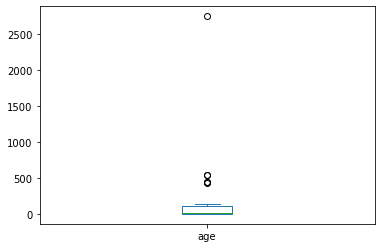

In [367]:
df['age'].value_counts().plot(kind = 'box')

<AxesSubplot:>

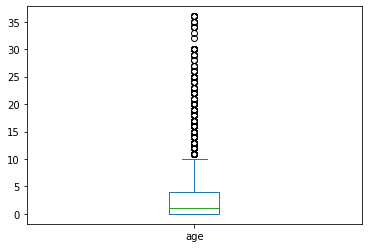

In [369]:
df['age'].plot(kind='box')

In [370]:
df['hasSold'] = np.where(df['sold'] == 0, False, np.where(df['sold'] != 0 , True))

ValueError: either both or neither of x and y should be given

In [372]:
df['hasSold'] = True

In [376]:
df['hasSold'] = np.where(  df['sold'] == 0 ,  False , True)

In [378]:
df['hasSold'].value_counts()

False    4814
True     1948
Name: hasSold, dtype: int64

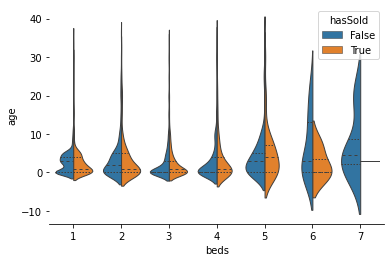

In [387]:
sns.violinplot(data=df, x="beds", y="age", hue="hasSold",
               split=True, inner="quart", linewidth=1
            #    palette={"Yes": "b", "No": ".85"}
            )
sns.despine(left=True)

In [386]:
df['age'].min()

0.0

In [401]:
cp = df

In [404]:
cp["district"][0] == 'حي النظيم'

True

In [405]:
if cp['district'][0] =='حي النظيم':
            for index, row in cp.iterrows():
    
                    cp['district'][index] = modify_arabic_display(cp['district'][index])
        
                    

/tmp/ipykernel_29918/1944720916.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cp['district'][index] = modify_arabic_display(cp['district'][index])


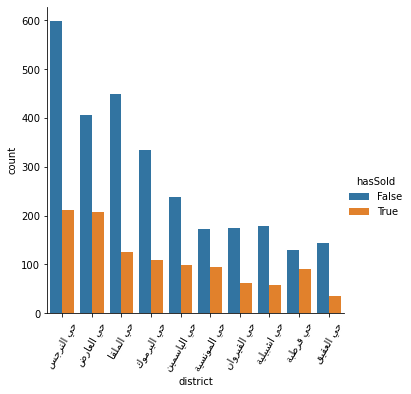

In [409]:
ax = sns.catplot(x="district", hue="hasSold", kind="count", data=cp ,  order=df.district.value_counts().iloc[:10].index)
ax.set_xticklabels(rotation = 60)

In [418]:
cp['hasSold']

0       False
1        True
2        True
3       False
4       False
        ...  
6757    False
6758    False
6759    False
6760    False
6761    False
Name: hasSold, Length: 6762, dtype: bool

In [421]:
cp1 = cp.groupby(['district' , 'hasSold']).size().reset_index(name = 'total')

In [434]:
cp1.loc[0]['hasSold']

False

In [433]:
first = cp1.loc[0]['total']

In [450]:
cp2 = pd.DataFrame()
cp2['district'] = False
cp2['total'] = False
cp2['hasSold'] = False
cp2


,district,total,hasSold


In [454]:
cp1['total']

0        7
1        1
2      178
3       57
4        5
      ... 
221      3
222      3
223      2
224      2
225      1
Name: total, Length: 226, dtype: int64

In [470]:
for index, row in cp1.iterrows():
    print(row['total'])

7
1
178
57
5
1
2
1
19
12
1
3
5
10
6
3
2
15
8
20
23
6
1
2
94
30
17
6
3
3
1
2
5
6
3
71
37
3
1
1
88
70
9
7
25
6
28
2
3
7
7
16
12
4
23
6
9
7
4
3
13
3
2
17
9
2
2
7
112
40
74
29
1
4
4
407
207
9
6
3
3
1
4
144
36
34
6
3
6
15
6
1
2
12
5
1
10
6
11
15
25
8
174
62
2
2
2
5
3
1
54
27
4
1
1
15
7
7
1
29
15
449
126
11
3
1
3
65
11
2
1
7
1
64
24
173
94
16
5
55
13
598
212
23
6
8
11
14
2
8
56
17
2
44
16
4
50
26
8
3
23
6
1
238
98
335
110
8
2
8
4
15
4
4
1
58
13
18
13
21
12
10
1
2
1
1
2
64
22
1
1
1
5
2
5
1
1
43
47
4
3
69
46
13
11
6
3
44
8
13
12
2
8
3
91
24
129
90
5
4
5
3
3
2
2
1


In [493]:
first = cp1['total'][0]

In [492]:
i = 0 
first = cp1['total'][0]
for index, row in cp1.iterrows():
    
    t=3
    t+=1
    if ((index == 0) or (index % 2 == 0)) :
        first  = row['total'] 
        
    else:
        if (row['total'] > first):
            cp2['district'][i] = row['district']
            cp2['total'][i] = row['total']
            cp2['hasSold'][i] = row['hasSold']
            i+=1
        else:
           t=1

ValueError: 

In [490]:
t

1

In [ ]:
cp1[cp1.district.str.contains(cp2) == True]


TypeError: unhashable type: 'list'

In [ ]:
df['district']

0        ﺣﻲ ﺍﻟﻨﻈﻴﻢ
1       ﺣﻲ ﺍﻟﻔﻴﺤﺎﺀ
2        ﺣﻲ ﺍﻟﺮﻣﺎﻝ
3        ﺣﻲ ﺍﻟﻌﻘﻴﻖ
4       ﺣﻲ ﺍﻟﺘﻌﺎﻭﻥ
           ...    
6757     ﺣﻲ ﺍﻟﻨﺮﺟﺲ
6758      ﺣﻲ ﻏﺒﻴﺮﺓ
6759    ﺣﻲ ﺍﻟﻴﺮﻣﻮﻙ
6760     ﺣﻲ ﺍﻟﻨﺮﺟﺲ
6761     ﺣﻲ ﺍﻟﻨﺮﺟﺲ
Name: district, Length: 6762, dtype: object

In [ ]:
            for index, row in df.iterrows():
    
                    df['district'][index] = modify_arabic_display(df['district'][index])

/tmp/ipykernel_29918/1018757218.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['district'][index] = modify_arabic_display(df['district'][index])
